Objective:
Build a machine learning model that evaluates a person's demographic and works status to predict a need for extra mental health care.

Steps:

Data Collection:

Identify a dataset with relevant healthcare information. You might find datasets on platforms like Kaggle or from public health organizations.
The dataset should include features such as patient demographics, medical history, lab results, and information about the disease outcome.

Data Preprocessing:
Clean the dataset by handling missing values, outliers, and any inconsistencies.
Perform exploratory data analysis (EDA) to gain insights into the data distribution and relationships between variables.
Feature Engineering:

Create relevant features that might contribute to predicting disease outcomes.
Consider transforming categorical variables, scaling numerical features, and encoding categorical variables.

Data Splitting:
Split the dataset into training and testing sets to evaluate the model's performance accurately.

Model Selection:
Choose machine learning algorithms suitable for the task. Common algorithms for classification tasks include logistic regression, decision trees, random forests, support vector machines, and gradient boosting.
Model Training:

Train the selected models on the training dataset.
Use techniques like cross-validation to tune hyperparameters and avoid overfitting.
Model Evaluation:

Evaluate the model's performance on the testing dataset using appropriate metrics such as accuracy, precision, recall, and F1 score.
Utilize ROC curves and AUC-ROC scores for binary classification models.
Model Interpretability:

Depending on the algorithm chosen, explore ways to interpret the model's decisions. This could involve feature importance analysis or using interpretable models.
Deployment (Optional):

If applicable, consider deploying the model as part of a healthcare decision support system.
Ensure that the deployment adheres to privacy and ethical considerations, especially when dealing with sensitive healthcare data.
Documentation and Communication:

Document the entire process, including data cleaning, preprocessing, model selection, and evaluation.
Create visualizations and summaries to communicate findings effectively.
Technologies:

Python programming language (pandas, numpy for data manipulation; scikit-learn for machine learning algorithms)
Jupyter Notebooks for interactive development and documentation
Matplotlib and seaborn for data visualization
This project will provide you with hands-on experience in handling healthcare data, preprocessing, feature engineering, and building machine learning models for predictive analytics in a healthcare context. It's important to be mindful of ethical considerations and data privacy regulations when working with healthcare data.

Created using help from:
    
    Chat GPT
    
    https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

os.chdir('/home/643aa895-acfe-4a55-9f84-aff3b9a97360/HealthStudy')

surveyData = pd.read_csv('HealthSurvey.csv')
    #This data came from: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/

surveyData.head(5)



,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# First, let's describe some of the data to get a feel for it

minAge = surveyData.Age.min()
maxAge = surveyData.Age.max()
avgAge = int(surveyData.Age.mean())

print(f'In this study, participants averaged {avgAge} years old, with a range of {minAge} to {maxAge} years old')

In this study, participants averaged 79428148 years old, with a range of -1726 to 99999999999 years old


There are definitely some issues with the data. For age, I'm going to set any age above 120 or below 18 to 'NaN'

In [7]:
surveyData.Age = np.where((surveyData.Age > 120) | (surveyData.Age < 18), np.nan, surveyData.Age)
        # np.where(condition, x, y): This function is used to replace values where the condition is True with x and where the condition is False with y.


In [8]:
# Print average, max, and min age

minAge = surveyData.Age.min()
maxAge = surveyData.Age.max()
avgAge = int(surveyData.Age.mean())

print(f'In this study, participants averaged {avgAge} years old, with a range of {minAge} to {maxAge} years old')



In this study, participants averaged 32 years old, with a range of 18.0 to 72.0 years old


In [9]:
# Initial look at gender data

# surveyData.Gender.head(50)
# surveyData.Gender.describe()
# surveyData.Gender.unique()

# It looks like lots of variation due to typing input
    # I want to make male, Male, Cis Male, M, etc all say "Male," and same for female
    # The code below should group most of the "male" and "female" entries together, although it doesn't get all

surveyData.Gender = np.where((surveyData.Gender == 'male') | (surveyData.Gender == 'M') | (surveyData.Gender == 'Cis Male') | (surveyData.Gender == 'm'), 'Male', surveyData.Gender)
surveyData.Gender = np.where((surveyData.Gender == 'female') | (surveyData.Gender == 'F') | (surveyData.Gender == 'Cis Female') | (surveyData.Gender == 'f'), 'Female', surveyData.Gender)

In [10]:
# Calculate and print the number of male, female, and other genders within the study

uniqueGenders = surveyData.Gender.value_counts()
# print(uniqueGenders)
maleCount = uniqueGenders.Male
femaleCount = uniqueGenders.Female
otherCount = sum(uniqueGenders) - maleCount - femaleCount
print(f"Study includes {maleCount} males, {femaleCount} females, and {otherCount} other")


Study includes 973 males, 237 females, and 49 other


In [11]:
# To simplify, for now, all other genders will be grouped together so there will be 3 groups, male, female, and other

# surveyData['Gender'] = surveyData['Gender'].replace(['male', 'female'], 'other')
# Replace values in 'Gender' column that are not 'male' or 'female' with 'other'
surveyData.loc[~surveyData.Gender.isin(['Male', 'Female']), 'Gender'] = 'Other'



In [12]:
# Mental Health Evaluation
# The most important metric for mental health evaluation is probably the "Treatment" data:
        # treatment: Have you sought treatment for a mental health condition?
    
# surveyData.treatment.head()
# surveyData.treatment.unique()

# This data must have come from a yes/no checkbox, so the data is clean with only Yes or No.



In [13]:
# Before getting complex, let's explore a simple correlation between age and risk for needing mental health help
# Scatter Plot: age vs. likelihood of having sought mental health help

# Group the data into 5 year age groups, starting with 18
# ageIdx = 18
# while ageIdx < maxAge:
#     age5 = ageIdx + 5
#     ageGroups[ageIdx] = surveyData[(surveyData['Age'] >= ageIdx) & (surveyData['Age'] < age5)][['Age', 'treatment']]
#     ageIdx += 5
    

In [14]:
ageIdx = 18
ageGroups = {}  # create an empty dictionary to store age groups

# Group the data into age brackets: 18-22, 23-28, etc.
while ageIdx < maxAge:
    age5 = ageIdx + 5
    ageGroups[ageIdx] = surveyData[(surveyData['Age'] >= ageIdx) & (surveyData['Age'] < age5)][['Age', 'treatment']]
    ageIdx += 5
    
yesCount = {}
noCount = {}
treatmentRatio = {}
countIdx = 0

for age, df in ageGroups.items():
    print(f"Age Group: {age} to {age + 4}")
    yesNoCount = df.treatment.value_counts() 
    
    yesCount[countIdx] = yesNoCount.get('Yes', 0) # Using .get will return a zero if there are no Yes or No's to avoid errors below
    noCount[countIdx] = yesNoCount.get('No', 0)

    # Treatment ratio is the percentage of study participants who have sought mental health treatment
    treatmentRatio[countIdx] = yesCount[countIdx]/(yesCount[countIdx] + noCount[countIdx])
    treatmentRatio[countIdx] *= 100 #Convert to a percentage

    print(f'   Group had {yesCount[countIdx]} seek treatment ({treatmentRatio[countIdx]:.1f}%), {noCount[countIdx]} not seek treatment')
    countIdx += 1


Age Group: 18 to 22
   Group had 28 seek treatment (47.5%), 31 not seek treatment
Age Group: 23 to 27
   Group had 142 seek treatment (46.7%), 162 not seek treatment
Age Group: 28 to 32
   Group had 177 seek treatment (48.5%), 188 not seek treatment
Age Group: 33 to 37
   Group had 139 seek treatment (51.5%), 131 not seek treatment
Age Group: 38 to 42
   Group had 85 seek treatment (58.2%), 61 not seek treatment
Age Group: 43 to 47
   Group had 38 seek treatment (58.5%), 27 not seek treatment
Age Group: 48 to 52
   Group had 7 seek treatment (33.3%), 14 not seek treatment
Age Group: 53 to 57
   Group had 12 seek treatment (85.7%), 2 not seek treatment
Age Group: 58 to 62
   Group had 3 seek treatment (60.0%), 2 not seek treatment
Age Group: 63 to 67
   Group had 0 seek treatment (0.0%), 1 not seek treatment
Age Group: 68 to 72
   Group had 1 seek treatment (100.0%), 0 not seek treatment


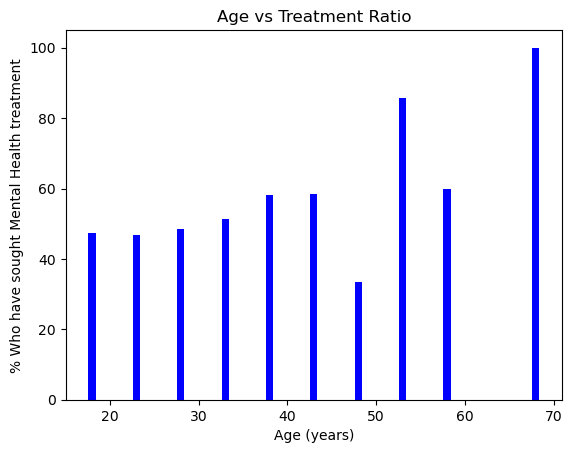

In [15]:
# Now plot the age vs ratio of those who sought treatment

# Create lists for age and treatmentRatio
ages = list(ageGroups.keys())
ratios = [treatmentRatio[idx] for idx in range(len(ageGroups))]

# Plotting
plt.bar(ages, ratios, color='blue')
plt.xlabel('Age (years)')
plt.ylabel('% Who have sought Mental Health treatment')
plt.title('Age vs Treatment Ratio')
plt.show()
   

Not really sure if there's much to conclude from this plot (it makes sense intuitively that the older a person is, the more likely they might have sought mental health treatment), but it is a good exercise to get a feel for some of the data.

In [43]:
# Now, a list of how complete all the data should be generated before continuing.

missingData = {}

for header in surveyData.columns:
    if header != 'comments': #I'm sure there's great information in the comments section, but that will be for more careful analysis later
        print(header)
        uniqueValues = surveyData[header].unique()
        print(uniqueValues)
 
        # if contains(surveyData[header].unique(),'na'):
        #     print('na here!')
        if any('na' in str(value).lower() for value in uniqueValues):
            print(f'Column "{header}" contains "na"')
        print('-' * 20)

Timestamp
['2014-08-27 11:34:53' '2014-08-27 11:35:12' '2014-08-27 11:35:24'
 '2014-08-27 11:35:48' '2014-08-27 11:36:24' '2014-08-27 11:36:48'
 '2014-08-27 11:37:08' '2014-08-27 11:37:59' '2014-08-27 11:38:12'
 '2014-08-27 11:38:55' '2014-08-27 11:39:36' '2014-08-27 11:40:51'
 '2014-08-27 11:41:17' '2014-08-27 11:42:15' '2014-08-27 11:43:22'
 '2014-08-27 11:43:36' '2014-08-27 11:44:43' '2014-08-27 11:44:55'
 '2014-08-27 11:45:51' '2014-08-27 11:46:49' '2014-08-27 11:47:10'
 '2014-08-27 11:48:57' '2014-08-27 11:51:07' '2014-08-27 11:52:07'
 '2014-08-27 11:52:44' '2014-08-27 11:54:27' '2014-08-27 11:56:29'
 '2014-08-27 11:57:54' '2014-08-27 11:59:31' '2014-08-27 12:01:50'
 '2014-08-27 12:03:30' '2014-08-27 12:05:13' '2014-08-27 12:10:43'
 '2014-08-27 12:11:00' '2014-08-27 12:12:47' '2014-08-27 12:13:30'
 '2014-08-27 12:15:30' '2014-08-27 12:16:21' '2014-08-27 12:18:02'
 '2014-08-27 12:18:04' '2014-08-27 12:18:38' '2014-08-27 12:20:10'
 '2014-08-27 12:22:55' '2014-08-27 12:23:48' '2014-0

In [18]:
surveyData.describe()

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [19]:

# Drop the 'comments' column (since most don't have data there), then drop rows with missing values to simplify
    # This process drops the data from 1251 responses to 587. It would be worth the time later to find ways to include more of that ~700 that get dropped
if 'comments' in surveyData.columns:
    surveyData = surveyData.drop('comments', axis=1)
surveyData = surveyData.dropna()

# Now the survey variables need to be converted into numbers

# Encode categorical variables
label_encoder = LabelEncoder()
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2} # You can do this automatically, but I like having it written out, at least for some of the simpler cases
surveyData['Gender'] = surveyData['Gender'].map(gender_mapping)

# Identify columns with only 'Yes' or 'No' then convert 'Yes' to 1 and 'No' to 0
binaryColumns = []
for column in surveyData.columns:
    uniqueValues = surveyData[column].unique()
    if len(uniqueValues) == 2 and 'Yes' in uniqueValues and 'No' in uniqueValues:
        surveyData[column] = np.where((surveyData[column] == 'Yes'), 1, 0)
        binaryColumns.append(column)

# Display the identified columns
# print("Columns with only 'Yes' or 'No':", binary_columns)

# So now  these columns are numerical/binary
# ['Gender','self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
# Treatment is the dependent variable


In [20]:
# Define features (inputs) and target variable (output)
input = surveyData[['Gender','self_employed', 'family_history', 'remote_work', 'tech_company', 'obs_consequence']] # 12/5/23 - Accidentally included 'treatement' (the dependent variable) in this list and got a model accuracy of 100%. I was quite confused.
output = surveyData['treatment']

# print(input)
# print(output)

# Split the data into training and testing sets
    # This line splits the data into training and testing sets using the train_test_split function. It allocates 80% of the data to the training set and 20% to the testing set
    # random_state = 42 is the seed for the random number generator. If you use the same random_state value in another call to train_test_split with the same input data, you will get the same split. 
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(input_train, output_train)

# # Make predictions on the test set
output_pred = model.predict(input_test)

# Evaluate the model
accuracy = accuracy_score(output_test, output_pred)
conf_matrix = confusion_matrix(output_test, output_pred)
classification_rep = classification_report(output_test, output_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Definitions:
    # Accuracy: The proportion of correctly predicted instances.
    # Confusion Matrix: A table showing the true positives, true negatives, false positives, and false negatives.
    # Classification Report: Provides precision, recall, F1-score, and support for each class.

Accuracy: 0.68
Confusion Matrix:
[[15 13]
 [25 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.54      0.44        28
           1       0.83      0.72      0.77        90

    accuracy                           0.68       118
   macro avg       0.60      0.63      0.61       118
weighted avg       0.72      0.68      0.69       118



Confusion Matrix:

True Negatives (TN): 15
True Positives (TP): 65
False Negatives (FN): 25
False Positives (FP): 13
The confusion matrix shows that there are 15 instances of class 0 (negative class) correctly predicted as class 0 (true negatives), 65 instances of class 1 (positive class) correctly predicted as class 1 (true positives), 25 instances of class 1 incorrectly predicted as class 0 (false negatives), and 13 instances of class 0 incorrectly predicted as class 1 (false positives).

In [22]:
# Assuming 'model' is the trained logistic regression model
coefficients = model.coef_[0]
variable_names = input.columns

# Create a DataFrame to display the coefficients and variable names
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Print the coefficients
print(coefficients_df)

# Positive coefficients indicate an increase in the log-odds of the dependent variable for an increase in the corresponding independent variable, while negative coefficients indicate a decrease in log-odds.


          Variable  Coefficient
0           Gender     0.440352
1    self_employed    -0.368155
2   family_history     1.471322
3      remote_work     0.158111
4     tech_company     0.040076
5  obs_consequence     0.199642


Initial observations:
I know that interpretations should be done cautiously, and for now, I'm not considering statistical significance, multicollinearity, and other complexities. Logistic regression coefficients represent changes in log-odds of the dependent variable ('treatment' here), so interpretations for now are general.

Gender: being female (1) has an increase in the log-odds likelihood of seeking treatment
Family history: The strongest coefficient. If your family had treatment history, you seem much more likely to have as well

Self employed: The only negative correlation thus far. So saying Yes to being self employed means you were LESS likely to have needed/sought mental health treatment.

Tech company: Initially, it seems like working for a tech company has little effect on whether or not you might need to seek mental health treatment.



